# Final Capstone Project 

## Introduction

Many IT companies landed their headquarters in the pacific northwest. To name a few: Amazon, Tableau, Redfin from Seattle; Microsoft from Redmond and Expedia from Bellevue. This not only caused a growth in population but also a great increase in housing price in those cities. Because houses are becoming unaffordable to a lot of people working in those big cities, the outer cities have become popular for newcomers to move into. This notebook will explore the most popular cities with IT companies: Seattle, Bellevue and Redmond grouped and 5 nearby cities and observe the differences.

## Data

#### Zillow Housing Data

Home value forecast data can be downloaded from the Zillow research website.  By using this data, I will find five nearby cities from the popular cities (Seattle, Bellevue and Redmond) with the highest forecast percentage increase in home value.

#### Latitude and Longitude Data

For each neighborhood, I will use the geocoder library to get the latitude and longitude.

#### Foursquare Location Data

By using the /venues/explore endpoint, I will download venues for Seattle, Bellevue and Redmond, then put the data into one dataframe.  Another dataframe will also be created to store venues for 5 nearby cities.  For each city, I will follow the steps from a previous assignment and group the venues to show the top 10 venue categories.  Finally, apply clustering to both group venues and explore the differences.

## Methodology 

### Find five nearby cities of Seattle, Bellevue and Redmond

Zillow has data available that shows the home value forecast for the next year for US cities.  I will use this data to find five cities and have the highest forecasted percentage changes.

First the data is loaded into a panda dataframe.

In [1]:
import pandas as pd 

forecast_df = pd.read_csv(
    "C:\AllRegionsForePublic.csv",
    header=0,
    delimiter=","
)
forecast_df.head()

,Region,RegionName,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange
0,Country,United States,NaN,NaN,NaN,2021-05-31,0.0
1,State,Alabama,AL,NaN,NaN,2021-05-31,0.5
2,State,Alaska,AK,NaN,NaN,2021-05-31,-4.4
3,State,Arizona,AZ,NaN,NaN,2021-05-31,1.7
4,State,Arkansas,AR,NaN,NaN,2021-05-31,-0.2


Summary of the features from the forecast dataframe:<br/><br/>
<b>Region</b> - Whether the row is a forecast for country, state, county, city, neighborhood or zipcode.<br/>
<b>RegionName</b> - The name for the country, state, county, neighborhood or zipcode.<br/>
<b>StateName</b> - If the row is a forecast for a state, this is the name of the state.<br/>
<b>CountyName</b> - If the row is a forecast for a county, this is the name of the county.<br/>
<b>CityName</b> - If the row is a forecast for a city, this is the name of the city.<br/>
<b>ForecastedDate</b> - Date when this forecast was done.<br/>
<b>ForecastYoYPctChange</b> - The yearly forecast percentage change for this region.  More information can be found here: https://www.zillow.com/research/data/

Seattle, Bellevue and Redmond are all in King County.  I will find the five nearby cities that are from King county.  To show the three cities are from King county, we can use the following query.

In [2]:
forecast_df.loc[
    (forecast_df["Region"] == "City") &
    (
        (forecast_df["RegionName"] == "Seattle") |
        (forecast_df["RegionName"] == "Bellevue") |
        (forecast_df["RegionName"] == "Redmond")
    ) &
    (forecast_df["StateName"] == "WA")
]

,Region,RegionName,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange
5481,City,Bellevue,WA,King County,Bellevue,2021-05-31,0.8
23420,City,Redmond,WA,King County,Redmond,2021-05-31,0.8
25072,City,Seattle,WA,King County,Seattle,2021-05-31,0.3


Now let's load all the King County cities into a dataframe and sort by <i>ForecastYoYPctChange</I>.

In [3]:
kingcounty_df = forecast_df.loc[
    (forecast_df["StateName"] == "WA") &
    (forecast_df["CountyName"] == "King County") &
    (forecast_df["Region"] == "Neighborhood") &
    (
        (forecast_df["CityName"] != "Seattle") &
        (forecast_df["CityName"] != "Bellevue") &
        (forecast_df["CityName"] != "Redmond")
    )
]
kingcounty_df.groupby(['CityName']).mean().sort_values(by=["ForecastYoYPctChange"], ascending=False)

,ForecastYoYPctChange
CityName,
Kent,1.857143
Federal Way,1.621429
Auburn,1.600000
Des Moines,1.355556
Burien,1.242857
Renton,1.007246
Kirkland,0.760000
North Bend,0.676923
Sammamish,0.620000


The top five cities are Kent, Federal Way, Auburn, Des Moines and Burien.

In order to get more venue data, I will break down the cities into neighborhoods.

Neighborhoods for Seattle, Bellevue and Redmond:

In [4]:
popular_cities_neighborhoods = forecast_df.loc[
    (
        (forecast_df["CityName"] == "Seattle") |
        (forecast_df["CityName"] == "Bellevue") |
        (forecast_df["CityName"] == "Redmond")
    ) &
    (forecast_df["StateName"] == "WA") &
    (forecast_df["Region"] == "Neighborhood") &
    (forecast_df["CountyName"] == "King County")
]
popular_cities_neighborhoods.shape

(129, 7)

There are too many neighborhoods to examine, let's just take the ones with <i>ForecastYoYPctChange</i> > 0.5.

In [5]:
grouped = popular_cities_neighborhoods.groupby(['RegionName']).mean().sort_values(by=["ForecastYoYPctChange"], ascending=False)
filtered_popular_neighborhoods = grouped[grouped["ForecastYoYPctChange"] > 0.5]
popular_neighborhoods_df = popular_cities_neighborhoods[
    popular_cities_neighborhoods["RegionName"].isin(filtered_popular_neighborhoods.index.values.tolist())
]
popular_neighborhoods_df.shape

(44, 7)

Neighborhoods for Kent, Federal Way, Auburn, Des Moines and Burien:

In [6]:
nearby_cities_neighborhoods = forecast_df.loc[
    (
        (forecast_df["CityName"] == "Kent") |
        (forecast_df["CityName"] == "Federal Way") |
        (forecast_df["CityName"] == "Auburn") |
        (forecast_df["CityName"] == "Des Moines") |
        (forecast_df["CityName"] == "Burien")
    ) &
    (forecast_df["StateName"] == "WA") &
    (forecast_df["Region"] == "Neighborhood") &
    (forecast_df["CountyName"] == "King County")
]
nearby_cities_neighborhoods.shape

(45, 7)

### Helper functions

In [7]:
import geocoder

def getCoordinates(city, neighborhood):
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
      g = geocoder.google("{} {}, wA".format(neighborhood, city))
      lat_lng_coords = g.latlng

    return lat_lng_coords

In [8]:
import requests

CLIENT_ID = "xxxxx"
CLIENT_SECRET = "xxxxxx"
VERSION = "20200714"
LIMIT = 50

def getNearbyVenues(neighborhoods, cities, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, city, lat, lng in zip(neighborhoods, cities, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        raw_data = requests.get(url).json()
        results = raw_data["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            "{}, {}".format(name, city),
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Seattle, Bellevue and Redmond

#### Get the latitude and longitude for neighborhoods in Seattle, Bellevue and Redmond, then show the neighborhoods on a map.

In [10]:
popular_neighborhoods = popular_neighborhoods_df["RegionName"].to_numpy()
popular_cities = popular_neighborhoods_df["CityName"].to_numpy()
popular_neighborhoods_lats = []
popular_neighborhoods_longs = []

In [11]:
for city, neighbor in zip(popular_cities, popular_neighborhoods):
    lat_long = getCoordinates(city, neighbor)
    popular_neighborhoods_lats.append(lat_long[0])
    popular_neighborhoods_longs.append(lat_long[1])

In [12]:
print("{} Neighborhoods, {} latitudes, {} longitudes".format(
    len(popular_neighborhoods),
    len(popular_neighborhoods_lats),
    len(popular_neighborhoods_longs)
))

44 Neighborhoods, 44 latitudes, 44 longitudes


In [14]:
import folium

map_northwest_wa = folium.Map(location=[47.5775, -122.212], zoom_start=10)

# add markers to map
for lat, lng, city, neighborhood in zip(
    popular_neighborhoods_lats, popular_neighborhoods_longs, popular_cities, popular_neighborhoods
):
    label = '{}, {}'.format(neighborhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_northwest_wa)  
    
map_northwest_wa

#### Now get the venus for neighborhoods in Seattle, Bellevue and Redmond.

In [15]:
popular_neighborhoods_venues_df = getNearbyVenues(
    popular_neighborhoods,
    popular_cities,
    popular_neighborhoods_lats,
    popular_neighborhoods_longs
)

In [16]:
popular_neighborhoods_venues_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Admiral, Seattle",47.581196,-122.386552,Caffe Fiore,47.583689,-122.386373,Coffee Shop
1,"Admiral, Seattle",47.581196,-122.386552,Menchie's,47.580539,-122.386295,Frozen Yogurt Shop
2,"Admiral, Seattle",47.581196,-122.386552,Freshy's Coffee,47.578201,-122.386666,Coffee Shop
3,"Admiral, Seattle",47.581196,-122.386552,Circa Grill and Ale House,47.581030,-122.386621,American Restaurant
4,"Admiral, Seattle",47.581196,-122.386552,Admiral Bird,47.581078,-122.386384,Coffee Shop


In [17]:
popular_neighborhoods_venues_df.shape

(645, 7)

In [18]:
print('There are {} unique venue categories in Seattle, Bellevue and Redmond.'.format(len(popular_neighborhoods_venues_df['Venue Category'].unique())))

There are 201 unique venue categories in Seattle, Bellevue and Redmond.


<b>There are too many venu types returned by Foursquare API.  Grouping similar venue types so we could hopefully get a better model later.</b>

In [19]:
restaurants = []
theaters = []
stadiums = []
museums = []
stores = []
shops = []
fields = []
workout_studios = []
service_shops = []
other_shops = []
bite_places = []
updated_venue_categories = []

dessert_shops = [
    "Bagel Shop", "Bubble Tea Shop", "Chocolate Shop", 
    "Coffee Shop", "Cupcake Shop", "Dessert Shop", 
    "Donut Shop", "Fish & Chips Shop", "Frozen Yogurt Shop",
    "Ice Cream Shop", "Bakery"
]
other_dessert_places = ["Bakery"]
workout_studios = ['Yoga Studio', 'Dance Studio', 'Cycle Studio']
professional_service_shops = [
    'Tailor Shop', 'Bridal Shop', 
    'Print Shop', 'Bike Shop', 'Other Repair Shop', 
    'Automotive Shop'
]
other_restaurants = ["Gastropub", "Diner", "Breakfast Spot", "BBQ Joint", "Burger Joint", "Steakhouse", "Noodle House", "Food Court", "Fried Chicken Joint"]

reduced_popular_neighborhoods_venues_df = pd.DataFrame(columns=popular_neighborhoods_venues_df.columns.tolist())
for index, row in popular_neighborhoods_venues_df.iterrows():
    data = {
        "Neighborhood": row["Neighborhood"],
        "Neighborhood Latitude": row["Neighborhood Latitude"],
        "Neighborhood Longitude": row["Neighborhood Latitude"],
        "Venue": row["Venue"],
        "Venue Latitude": row["Venue Latitude"],
        "Venue Longitude": row["Venue Longitude"],
        "Venue Category": row["Venue Category"]
    }
    
    venue_category = row["Venue Category"]
    
    if ("Restaurant" in venue_category) | (venue_category in other_restaurants):
        data["Venue Category"] = "Restaurant"
    elif "Theater" in venue_category:
        data["Venue Category"] = "Theater"
    elif "Stadium" in venue_category:
        data["Venue Category"] = "Stadium"
    elif "Museum" in venue_category:
        data["Venue Category"] = "Museum"
    elif "Store" in venue_category:
        data["Venue Category"] = "Store"
    elif ((("Shop" in venue_category) & (venue_category in dessert_shops)) | (venue_category in other_dessert_places)):
        data["Venue Category"] = "Dessert Shop"
    elif venue_category in professional_service_shops:
        data["Venue Category"] = "Professional Service"
    elif "Field" in venue_category:
        data["Venue Category"] = "Field"
    elif (("Studio" in venue_category) & (venue_category in workout_studios)) | ("Gym" in venue_category):
        data["Venue Category"] = "Workout"
    elif ("Shop" in venue_category) & (not("Mall" in venue_category)):
        data["Venue Category"] = "Shop"
    elif "Place" in venue_category:
        data["Venue Category"] = "Bite places"
    elif ("Bus" in venue_category) | ("Light Rail Station" in venue_category):
        data["Venue Category"] = "Transportation"
    elif ("Bar" in venue_category) & (not ("Dive" in venue_category)):
        data["Venue Category"] = "Bar"
    elif "Market" in venue_category:
        data["Venue Category"] = "Market"
    elif "Dog Run" in venue_category:
        data["Venue Category"] = "Park"
    
    reduced_popular_neighborhoods_venues_df = reduced_popular_neighborhoods_venues_df.append(data, ignore_index=True)
    
popular_neighborhoods_venues_df = reduced_popular_neighborhoods_venues_df

In [21]:
print('There are {} unique venue categories in Seattle, Bellevue and Redmond.'.format(len(popular_neighborhoods_venues_df['Venue Category'].unique())))

There are 89 unique venue categories in Seattle, Bellevue and Redmond.


In [37]:
# DON"T DELETE YET
popular_neighborhoods_venues_df_bk = popular_neighborhoods_venues_df.copy()

#### Create a data frame with all the possible venue categories as columns. If a row is in a category, mark the value as 1, else mark it as 0.

In [23]:
# one hot encoding
popular_neighborhoods_onehot = pd.get_dummies(popular_neighborhoods_venues_df[['Venue Category']], prefix="", prefix_sep="")
popular_neighborhoods_onehot = popular_neighborhoods_onehot.drop(["Neighborhood"], axis=1)

# add neighborhood and city columns back to dataframe
popular_neighborhoods_onehot['Neighborhood'] = popular_neighborhoods_venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [popular_neighborhoods_onehot.columns[-1]] + list(popular_neighborhoods_onehot.columns[:-1])
popular_neighborhoods_onehot = popular_neighborhoods_onehot[fixed_columns]

popular_neighborhoods_onehot.shape

(645, 89)

In [24]:
popular_neighborhoods_onehot.head()

,Neighborhood,Arcade,Art Gallery,Athletics & Sports,Auto Garage,Auto Workshop,Bank,Bar,Basketball Court,Beach,...,Tanning Salon,Tennis Court,Theater,Tour Provider,Trail,Transportation,University,Vacation Rental,Winery,Workout
0,"Admiral, Seattle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Admiral, Seattle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Admiral, Seattle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Admiral, Seattle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Admiral, Seattle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Group by neighborhoods and take the mean of the scores.

In [25]:
popular_neighborhoods_grouped = popular_neighborhoods_onehot.groupby('Neighborhood').mean().reset_index()
popular_neighborhoods_grouped.head()

,Neighborhood,Arcade,Art Gallery,Athletics & Sports,Auto Garage,Auto Workshop,Bank,Bar,Basketball Court,Beach,...,Tanning Salon,Tennis Court,Theater,Tour Provider,Trail,Transportation,University,Vacation Rental,Winery,Workout
0,"Admiral, Seattle",0.0,0.025000,0.0,0.0,0.0,0.025,0.125000,0.0,0.000000,...,0.0,0.000000,0.025000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.025000
1,"Alki, Seattle",0.0,0.058824,0.0,0.0,0.0,0.000,0.058824,0.0,0.058824,...,0.0,0.029412,0.000000,0.0,0.029412,0.000000,0.0,0.0,0.0,0.000000
2,"Beacon Hill, Seattle",0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.666667,0.0,0.0,0.0,0.000000
3,"Columbia City, Seattle",0.0,0.000000,0.0,0.0,0.0,0.000,0.076923,0.0,0.000000,...,0.0,0.000000,0.025641,0.0,0.000000,0.000000,0.0,0.0,0.0,0.051282
4,"Crossroads, Bellevue",0.0,0.000000,0.0,0.0,0.0,0.000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.333333


#### Elbow method to find the optimal "k"

In [27]:
from sklearn.cluster import KMeans

ss_distance = []
K = range(1,41)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++')
    output = km.fit(popular_neighborhoods_grouped_clustering)
    ss_distance.append(output.inertia_)

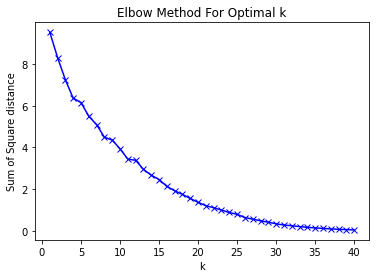

In [28]:
import matplotlib.pyplot as plt  

plt.plot(K, ss_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Square distance')
plt.title('Elbow Method For Optimal k')
plt.show()

From the graph above, elbow method doesn't work well to find the optimal k value for k-mean model.  Let's take a small k (k=5) for the purpose of this assignment to explore the clusters. 

In [29]:
kclusters = 5
km = KMeans(n_clusters=kclusters, init='k-means++')
output = km.fit(popular_neighborhoods_grouped_clustering)
labels = output.labels_
labels

array([3, 3, 4, 3, 1, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 2, 2, 3, 0, 3, 4, 2,
       3, 3, 3, 4, 0, 4, 2, 0, 3, 2, 1, 3, 1, 2, 3, 1, 0, 2, 2, 2, 3])

<b>Clean up the venues data so it's grouped by neigborhoods and only showing the top 10 venues. </b>

In [30]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = popular_neighborhoods_grouped['Neighborhood']

for ind in np.arange(popular_neighborhoods_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(popular_neighborhoods_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Admiral, Seattle",Restaurant,Dessert Shop,Store,Bar,Pub,Workout,Spa,Market,Gas Station,Field
1,"Alki, Seattle",Restaurant,Dessert Shop,Bar,Beach,Bite places,Park,Art Gallery,Trail,Outdoor Sculpture,Tennis Court
2,"Beacon Hill, Seattle",Transportation,Home Service,Workout,Gas Station,Dessert Shop,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service
3,"Columbia City, Seattle",Restaurant,Bite places,Dessert Shop,Bar,Workout,Store,Chiropractor,Field,Food Truck,Gas Station
4,"Crossroads, Bellevue",Workout,Building,Pharmacy,Design Studio,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,Food Truck


<b>Add the cluster label column.</b>

In [31]:
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(columns=["Cluster Labels"])
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', labels)

merged_popular_neighborhoods = neighborhoods_venues_sorted

lats_found = []
longs_found = []
for neighborhood in merged_popular_neighborhoods["Neighborhood"]:
    index = popular_neighborhoods.tolist().index(neighborhood.split(", ")[0])
    lats_found.append(popular_neighborhoods_lats[index])
    longs_found.append(popular_neighborhoods_longs[index])
    
merged_popular_neighborhoods["Latitude"] = lats_found
merged_popular_neighborhoods["Longitude"] = longs_found

merged_popular_neighborhoods.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,3,"Admiral, Seattle",Restaurant,Dessert Shop,Store,Bar,Pub,Workout,Spa,Market,Gas Station,Field,47.581196,-122.386552
1,3,"Alki, Seattle",Restaurant,Dessert Shop,Bar,Beach,Bite places,Park,Art Gallery,Trail,Outdoor Sculpture,Tennis Court,47.575463,-122.410658
2,4,"Beacon Hill, Seattle",Transportation,Home Service,Workout,Gas Station,Dessert Shop,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,47.552585,-122.300937
3,3,"Columbia City, Seattle",Restaurant,Bite places,Dessert Shop,Bar,Workout,Store,Chiropractor,Field,Food Truck,Gas Station,47.560796,-122.286962
4,1,"Crossroads, Bellevue",Workout,Building,Pharmacy,Design Studio,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,Food Truck,47.617159,-122.153627


<b>Show the clusters on a map.</b>

In [32]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[47.5775, -122.212], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged_popular_neighborhoods['Latitude'], merged_popular_neighborhoods['Longitude'], merged_popular_neighborhoods['Neighborhood'], merged_popular_neighborhoods['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<b>Below is a summary of the clusters for the popular cities.</b>

In [33]:
merged_popular_neighborhoods.loc[merged_popular_neighborhoods['Cluster Labels'] == 0]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
8,0,"Education Hill, Redmond",Park,Field,Workout,Library,Dessert Shop,Dive Bar,Eye Doctor,Fishing Spot,Food Service,Food Truck,47.688276,-122.112728
18,0,"Idylwood, Redmond",Construction & Landscaping,Park,Design Studio,Dessert Shop,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,Food Truck,47.643701,-122.105202
26,0,"Newport Hills, Bellevue",Restaurant,Home Service,Park,Workout,Garden,Dessert Shop,Dive Bar,Eye Doctor,Field,Fishing Spot,47.540933,-122.176511
29,0,"Northwest Bellevue, Bellevue",Market,Food Truck,Park,Workout,Gas Station,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,47.625582,-122.199278
38,0,"Somerset, Bellevue",Dessert Shop,Park,Workout,Library,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,Food Truck,47.556171,-122.158861


Cluster one can be categorized as parks or big fields.

In [34]:
merged_popular_neighborhoods.loc[merged_popular_neighborhoods['Cluster Labels'] == 1]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
4,1,"Crossroads, Bellevue",Workout,Building,Pharmacy,Design Studio,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,Food Truck,47.617159,-122.153627
32,1,"Rainier View, Seattle",Workout,Gun Range,Lounge,University,Garden,Design Studio,Dessert Shop,Dive Bar,Eye Doctor,Field,47.504357,-122.259445
34,1,"Rose Hill, Redmond",Workout,University,Gun Range,Gas Station,Dessert Shop,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,47.688543,-122.155693
37,1,"Sammamish Valley, Redmond",Workout,Winery,Dessert Shop,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,Food Truck,Garden,47.692793,-122.142107


Cluster two can be categorized as workout/excercise studios or gyms.

In [35]:
merged_popular_neighborhoods.loc[merged_popular_neighborhoods['Cluster Labels'] == 2]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
12,2,"Grass Lawn, Redmond",Field,Park,Playground,Transportation,Tennis Court,Workout,Garden,Dessert Shop,Dive Bar,Eye Doctor,47.667798,-122.143074
15,2,"Hidden Valley, Bellevue",Recreation Center,Field,Food Truck,Deli / Bodega,Design Studio,Dessert Shop,Dive Bar,Eye Doctor,Fishing Spot,Food Service,47.628898,-122.193318
16,2,"Highland Park, Seattle",Playground,Restaurant,Field,Park,Store,Workout,Food Truck,Dessert Shop,Dive Bar,Eye Doctor,47.524698,-122.346023
21,2,"Lakewood, Seattle",Park,Lake,Playground,Massage Studio,Field,Harbor / Marina,Café,Bite places,Workout,Food Truck,47.563155,-122.271791
28,2,"North Redmond, Redmond",Playground,Pilates Studio,Workout,Design Studio,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,Food Truck,47.707345,-122.113092
31,2,"Rainier Beach, Seattle",Garden,Vacation Rental,Field,Workout,Gas Station,Dessert Shop,Dive Bar,Eye Doctor,Fishing Spot,Food Service,47.512255,-122.263976
35,2,"Roxhill, Seattle",Store,Pool,Spa,Pharmacy,Eye Doctor,Park,Field,Design Studio,Dessert Shop,Dive Bar,47.526730,-122.369928
39,2,"South Delridge, Seattle",Store,Spa,Workout,Gas Station,Dessert Shop,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,47.526912,-122.360682
40,2,"Tam O'Shanter, Bellevue",Nightlife Spot,Pool,Plaza,Playground,Golf Course,Park,Workout,Dive Bar,Eye Doctor,Field,47.621785,-122.097464
41,2,"Vasa, Bellevue",Construction & Landscaping,Trail,Basketball Court,Beach,Golf Course,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,47.577290,-122.112450


Cluster three can be categorized as parks with playground or also fields for outdoor usage.

In [36]:
merged_popular_neighborhoods.loc[merged_popular_neighborhoods['Cluster Labels'] == 3]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,3,"Admiral, Seattle",Restaurant,Dessert Shop,Store,Bar,Pub,Workout,Spa,Market,Gas Station,Field,47.581196,-122.386552
1,3,"Alki, Seattle",Restaurant,Dessert Shop,Bar,Beach,Bite places,Park,Art Gallery,Trail,Outdoor Sculpture,Tennis Court,47.575463,-122.410658
3,3,"Columbia City, Seattle",Restaurant,Bite places,Dessert Shop,Bar,Workout,Store,Chiropractor,Field,Food Truck,Gas Station,47.560796,-122.286962
5,3,"Downtown, Bellevue",Restaurant,Store,Dessert Shop,Bar,Bite places,Shopping Mall,Theater,Shop,Workout,Hotel,47.671023,-122.124110
6,3,"Downtown, Redmond",Restaurant,Dessert Shop,Store,Workout,Bite places,Shop,Bar,Food Truck,Theater,Tanning Salon,47.671023,-122.124110
7,3,"Downtown, Seattle",Restaurant,Dessert Shop,Bar,Hotel,Store,Bite places,Tour Provider,Theater,Plaza,Concert Hall,47.671023,-122.124110
9,3,"Fairmount Park, Seattle",Marijuana Dispensary,Restaurant,Campground,Park,Bite places,Workout,Garden,Dive Bar,Eye Doctor,Field,47.553543,-122.380356
10,3,"Genesee, Seattle",Restaurant,Store,Bite places,Market,Playground,Pharmacy,Bookstore,Design Studio,Lounge,Dessert Shop,47.563306,-122.392791
11,3,"Georgetown, Seattle",Restaurant,Dessert Shop,Store,Bar,Café,Lounge,Park,Gas Station,Dive Bar,Brewery,47.547510,-122.321452
13,3,"Green Lake, Seattle",Restaurant,Dessert Shop,Workout,Spa,Store,Organic Grocery,Playground,Boat Rental,Bite places,Lake,47.679834,-122.325783


Cluster four can be categorized as restaurants.

In [65]:
merged_popular_neighborhoods.loc[merged_popular_neighborhoods['Cluster Labels'] == 4]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
2,4,"Beacon Hill, Seattle",Transportation,Home Service,Workout,Gas Station,Dessert Shop,Dive Bar,Eye Doctor,Field,Fishing Spot,Food Service,47.552585,-122.300937
20,4,"Interlake, Bellevue",Transportation,Workout,Rental Service,Deli / Bodega,Garden,Dessert Shop,Dive Bar,Eye Doctor,Field,Fishing Spot,47.628934,-122.124041
25,4,"Montlake, Seattle",Transportation,Bar,Restaurant,Store,Professional Service,Dessert Shop,Library,Bank,Gas Station,Dive Bar,47.641737,-122.302031
27,4,"North Delridge, Seattle",Transportation,Workout,Dessert Shop,Theater,Field,Scenic Lookout,Skate Park,Food Truck,Design Studio,Dive Bar,47.562347,-122.365478


Cluster five can be categorized as transportation services.

## Kent, Federal Way, Auburn, Des Moines and Burien

#### Get the latitude and longitude for neighborhoods in Seattle, Bellevue and Redmond, then show the neighborhoods on a map

In [37]:
nearby_neighborhoods = nearby_cities_neighborhoods["RegionName"].to_numpy()
nearby_cities = nearby_cities_neighborhoods["CityName"].to_numpy()
nearby_neighborhoods_lats = []
nearby_neighborhoods_longs = []

In [38]:
for city, neighbor in zip(nearby_cities, nearby_neighborhoods):
    lat_long = getCoordinates(city, neighbor)
    nearby_neighborhoods_lats.append(lat_long[0])
    nearby_neighborhoods_longs.append(lat_long[1])

In [39]:
print("{} Neighborhoods, {} latitudes, {} longitudes".format(
    len(nearby_neighborhoods),
    len(nearby_neighborhoods_lats),
    len(nearby_neighborhoods_longs)
))

45 Neighborhoods, 45 latitudes, 45 longitudes


<b>Show the neighborhoods on a map.</b>

In [40]:
import folium

map_northwest_wa_nearby = folium.Map(location=[47.5775, -122.212], zoom_start=10)

# add markers to map
for lat, lng, city, neighborhood in zip(
    nearby_neighborhoods_lats, nearby_neighborhoods_longs, nearby_cities, nearby_neighborhoods
):
    label = '{}, {}'.format(neighborhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_northwest_wa_nearby)  
    
map_northwest_wa_nearby

<b>Get the venues for Kent, Federal Way, Auburn, Des Moines and Burien.</b>

In [41]:
nearby_neighborhoods_venues_df = getNearbyVenues(
    nearby_neighborhoods,
    nearby_cities,
    nearby_neighborhoods_lats,
    nearby_neighborhoods_longs
)

In [42]:
nearby_neighborhoods_venues_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Beverly Park, Burien",47.496210,-122.331514,Quick service,47.494340,-122.333370,Home Service
1,"Beverly Park, Burien",47.496210,-122.331514,Arbor Lake Park,47.492443,-122.329459,Park
2,"Boulevard Park, Burien",47.495848,-122.310456,Dollar Tree,47.495384,-122.309640,Discount Store
3,"Boulevard Park, Burien",47.495848,-122.310456,7-Eleven,47.498174,-122.308775,Convenience Store
4,"Boulevard Park, Burien",47.495848,-122.310456,Las Rieleras,47.496358,-122.310255,Mexican Restaurant


In [43]:
nearby_neighborhoods_venues_df.shape

(527, 7)

In [44]:
print('There are {} unique venue categories in Kent, Federal Way, Auburn, Des Moines and Burien.'.format(len(nearby_neighborhoods_venues_df['Venue Category'].unique())))

There are 151 unique venue categories in Kent, Federal Way, Auburn, Des Moines and Burien.


<b>Do the same venue grouping from what we did earlier for Seattle, Bellevue and Redmond.</b>

In [45]:
restaurants = []
theaters = []
stadiums = []
museums = []
stores = []
shops = []
fields = []
workout_studios = []
service_shops = []
other_shops = []
bite_places = []
updated_venue_categories = []

dessert_shops = [
    "Bagel Shop", "Bubble Tea Shop", "Chocolate Shop", 
    "Coffee Shop", "Cupcake Shop", "Dessert Shop", 
    "Donut Shop", "Fish & Chips Shop", "Frozen Yogurt Shop",
    "Ice Cream Shop", "Bakery"
]
other_dessert_places = ["Bakery"]
workout_studios = ['Yoga Studio', 'Dance Studio', 'Cycle Studio']
professional_service_shops = [
    'Tailor Shop', 'Bridal Shop', 
    'Print Shop', 'Bike Shop', 'Other Repair Shop', 
    'Automotive Shop'
]
other_restaurants = ["Gastropub", "Diner", "Breakfast Spot", "BBQ Joint", "Burger Joint", "Steakhouse", "Noodle House", "Food Court", "Fried Chicken Joint"]

reduced_nearby_neighborhoods_venues_df = pd.DataFrame(columns=nearby_neighborhoods_venues_df.columns.tolist())
for index, row in nearby_neighborhoods_venues_df.iterrows():
    data = {
        "Neighborhood": row["Neighborhood"],
        "Neighborhood Latitude": row["Neighborhood Latitude"],
        "Neighborhood Longitude": row["Neighborhood Latitude"],
        "Venue": row["Venue"],
        "Venue Latitude": row["Venue Latitude"],
        "Venue Longitude": row["Venue Longitude"],
        "Venue Category": row["Venue Category"]
    }
    
    venue_category = row["Venue Category"]
    
    if ("Restaurant" in venue_category) | (venue_category in other_restaurants):
        data["Venue Category"] = "Restaurant"
    elif "Theater" in venue_category:
        data["Venue Category"] = "Theater"
    elif "Stadium" in venue_category:
        data["Venue Category"] = "Stadium"
    elif "Museum" in venue_category:
        data["Venue Category"] = "Museum"
    elif "Store" in venue_category:
        data["Venue Category"] = "Store"
    elif ((("Shop" in venue_category) & (venue_category in dessert_shops)) | (venue_category in other_dessert_places)):
        data["Venue Category"] = "Dessert Shop"
    elif venue_category in professional_service_shops:
        data["Venue Category"] = "Professional Service"
    elif "Field" in venue_category:
        data["Venue Category"] = "Field"
    elif (("Studio" in venue_category) & (venue_category in workout_studios)) | ("Gym" in venue_category):
        data["Venue Category"] = "Workout"
    elif ("Shop" in venue_category) & (not("Mall" in venue_category)):
        data["Venue Category"] = "Shop"
    elif "Place" in venue_category:
        data["Venue Category"] = "Bite places"
    elif ("Bus" in venue_category) | ("Light Rail Station" in venue_category):
        data["Venue Category"] = "Transportation"
    elif ("Bar" in venue_category) & (not ("Dive" in venue_category)):
        data["Venue Category"] = "Bar"
    elif "Market" in venue_category:
        data["Venue Category"] = "Market"
    elif "Dog Run" in venue_category:
        data["Venue Category"] = "Park"
    
    reduced_nearby_neighborhoods_venues_df = reduced_nearby_neighborhoods_venues_df.append(data, ignore_index=True)
    
nearby_neighborhoods_venues_df = reduced_nearby_neighborhoods_venues_df

In [46]:
print('There are {} unique venue categories in Kent, Federal Way, Auburn, Des Moines and Burien.'.format(len(nearby_neighborhoods_venues_df['Venue Category'].unique())))

There are 74 unique venue categories in Kent, Federal Way, Auburn, Des Moines and Burien.


In [47]:
nearby_neighborhoods_venues_df.shape

(527, 7)

In [48]:
# one hot encoding
nearby_neighborhoods_onehot = pd.get_dummies(nearby_neighborhoods_venues_df[['Venue Category']], prefix="", prefix_sep="")

if "Neighborhood" in nearby_neighborhoods_onehot.columns:
    nearby_neighborhoods_onehot = nearby_neighborhoods_onehot.drop(["Neighborhood"], axis=1)

# add neighborhood and city columns back to dataframe
nearby_neighborhoods_onehot['Neighborhood'] = nearby_neighborhoods_venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nearby_neighborhoods_onehot.columns[-1]] + list(nearby_neighborhoods_onehot.columns[:-1])
nearby_neighborhoods_onehot = nearby_neighborhoods_onehot[fixed_columns]

nearby_neighborhoods_onehot.shape

(527, 75)

In [49]:
nearby_neighborhoods_onehot.head()

,Neighborhood,ATM,Art Gallery,Assisted Living,Bank,Bar,Beach,Bistro,Bite places,Boat or Ferry,...,Store,Supermarket,Tanning Salon,Tattoo Parlor,Tech Startup,Theater,Train Station,Transportation,Wings Joint,Workout
0,"Beverly Park, Burien",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Beverly Park, Burien",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Boulevard Park, Burien",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"Boulevard Park, Burien",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"Boulevard Park, Burien",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>Group by neighborhoods and take the mean of the scores.</b>

In [50]:
nearby_neighborhoods_grouped = nearby_neighborhoods_onehot.groupby('Neighborhood').mean().reset_index()
nearby_neighborhoods_grouped.head()

,Neighborhood,ATM,Art Gallery,Assisted Living,Bank,Bar,Beach,Bistro,Bite places,Boat or Ferry,...,Store,Supermarket,Tanning Salon,Tattoo Parlor,Tech Startup,Theater,Train Station,Transportation,Wings Joint,Workout
0,"Beverly Park, Burien",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,"Boulevard Park, Burien",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.090909,0.0,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,"Campus Highlands, Federal Way",0.0,0.0,0.0,0.142857,0.000000,0.000000,0.0,0.142857,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,"Central Des Moines, Des Moines",0.0,0.0,0.0,0.074074,0.074074,0.037037,0.0,0.037037,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0
4,"Evansville, Burien",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.285714,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


#### Elbow method to find the optimal "k"

In [52]:
nearby_neighborhoods_grouped_clustering = nearby_neighborhoods_grouped.drop("Neighborhood", 1)
nearby_neighborhoods_grouped.head()

,Neighborhood,ATM,Art Gallery,Assisted Living,Bank,Bar,Beach,Bistro,Bite places,Boat or Ferry,...,Store,Supermarket,Tanning Salon,Tattoo Parlor,Tech Startup,Theater,Train Station,Transportation,Wings Joint,Workout
0,"Beverly Park, Burien",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,"Boulevard Park, Burien",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.090909,0.0,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,"Campus Highlands, Federal Way",0.0,0.0,0.0,0.142857,0.000000,0.000000,0.0,0.142857,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,"Central Des Moines, Des Moines",0.0,0.0,0.0,0.074074,0.074074,0.037037,0.0,0.037037,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0
4,"Evansville, Burien",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.285714,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [54]:
from sklearn.cluster import KMeans

ss_distance = []
K = range(1,37)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++')
    output = km.fit(nearby_neighborhoods_grouped_clustering)
    ss_distance.append(output.inertia_)

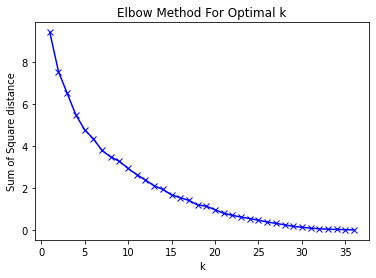

In [55]:
import matplotlib.pyplot as plt  

plt.plot(K, ss_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Square distance')
plt.title('Elbow Method For Optimal k')
plt.show()

Similar to the elbow method results for popular cities, the elbow method results for nearby cities are not helpful either.  Let's take a small k (k=5) for the purpose of this assignment to explore the clusters.

In [56]:
kclusters = 5
km = KMeans(n_clusters=kclusters, init='k-means++')
output = km.fit(nearby_neighborhoods_grouped_clustering)
labels = output.labels_
labels

array([0, 1, 1, 1, 1, 1, 2, 2, 3, 1, 4, 1, 1, 0, 1, 3, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 3])

<b>Clean up the venues data so it's grouped by neigborhoods and only showing the top 10 venues.</b>

In [57]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nearby_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
nearby_neighborhoods_venues_sorted['Neighborhood'] = nearby_neighborhoods_grouped['Neighborhood']

for ind in np.arange(nearby_neighborhoods_grouped.shape[0]):
    nearby_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nearby_neighborhoods_grouped.iloc[ind, :], num_top_venues)

nearby_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Beverly Park, Burien",Home Service,Park,Workout,Gas Station,Dry Cleaner,Event Space,Field,Food,Food Truck,Garden
1,"Boulevard Park, Burien",Store,Restaurant,Dessert Shop,Health & Beauty Service,Bite places,Park,Food Truck,Dive Spot,Dry Cleaner,Event Space
2,"Campus Highlands, Federal Way",Restaurant,Other Great Outdoors,Bank,Bite places,Shopping Mall,Garden,Dry Cleaner,Event Space,Field,Food
3,"Central Des Moines, Des Moines",Restaurant,Harbor / Marina,Bank,Bar,Gas Station,Pet Service,Park,Food Truck,Café,Butcher
4,"Evansville, Burien",Restaurant,Store,Rental Car Location,Garden,Event Space,Storage Facility,Hotel,Professional Service,Harbor / Marina,Gas Station


<b>Add the cluster label column.</b>

In [58]:
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(columns=["Cluster Labels"])
nearby_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', labels)

merged_nearby_neighborhoods = nearby_neighborhoods_venues_sorted

lats_found = []
longs_found = []
for neighborhood in merged_nearby_neighborhoods["Neighborhood"]:
    index =nearby_neighborhoods.tolist().index(neighborhood.split(", ")[0])
    lats_found.append(nearby_neighborhoods_lats[index])
    longs_found.append(nearby_neighborhoods_longs[index])
    
merged_nearby_neighborhoods["Latitude"] = lats_found
merged_nearby_neighborhoods["Longitude"] = longs_found

merged_nearby_neighborhoods.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,0,"Beverly Park, Burien",Home Service,Park,Workout,Gas Station,Dry Cleaner,Event Space,Field,Food,Food Truck,Garden,47.496210,-122.331514
1,1,"Boulevard Park, Burien",Store,Restaurant,Dessert Shop,Health & Beauty Service,Bite places,Park,Food Truck,Dive Spot,Dry Cleaner,Event Space,47.495848,-122.310456
2,1,"Campus Highlands, Federal Way",Restaurant,Other Great Outdoors,Bank,Bite places,Shopping Mall,Garden,Dry Cleaner,Event Space,Field,Food,47.290324,-122.324250
3,1,"Central Des Moines, Des Moines",Restaurant,Harbor / Marina,Bank,Bar,Gas Station,Pet Service,Park,Food Truck,Café,Butcher,47.401766,-122.324290
4,1,"Evansville, Burien",Restaurant,Store,Rental Car Location,Garden,Event Space,Storage Facility,Hotel,Professional Service,Harbor / Marina,Gas Station,47.481210,-122.332903


<b>Show the clusters on a map.</b>

In [59]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[47.5775, -122.212], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged_nearby_neighborhoods['Latitude'], merged_nearby_neighborhoods['Longitude'], merged_nearby_neighborhoods['Neighborhood'], merged_nearby_neighborhoods['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<b>Below is a summary of the clusters for the nearby cities.</b>

In [60]:
merged_nearby_neighborhoods.loc[merged_nearby_neighborhoods['Cluster Labels'] == 0]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,0,"Beverly Park, Burien",Home Service,Park,Workout,Gas Station,Dry Cleaner,Event Space,Field,Food,Food Truck,Garden,47.496210,-122.331514
13,0,"Madrona, Federal Way",Park,Lake,Restaurant,Museum,Field,Garden,Dive Spot,Dry Cleaner,Event Space,Food,47.321676,-122.303436
25,0,"Riverview, Kent",Park,Field,Home Service,Workout,Gas Station,Dry Cleaner,Event Space,Food,Food Truck,Garden,47.402848,-122.282053
29,0,"Seola Beach, Burien",Park,Workout,Gas Station,Dry Cleaner,Event Space,Field,Food,Food Truck,Garden,Harbor / Marina,47.493432,-122.367904
30,0,"Shorewood, Burien",Park,Beach,Harbor / Marina,Dry Cleaner,Event Space,Field,Food,Food Truck,Garden,Gas Station,47.497043,-122.363459
33,0,"Steel Lake, Federal Way",Lake,Park,Gas Station,Dry Cleaner,Event Space,Field,Food,Food Truck,Garden,Harbor / Marina,47.327597,-122.302328


Cluster one can be categorized as parks and fields.

In [61]:
merged_nearby_neighborhoods.loc[merged_nearby_neighborhoods['Cluster Labels'] == 1]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
1,1,"Boulevard Park, Burien",Store,Restaurant,Dessert Shop,Health & Beauty Service,Bite places,Park,Food Truck,Dive Spot,Dry Cleaner,Event Space,47.495848,-122.310456
2,1,"Campus Highlands, Federal Way",Restaurant,Other Great Outdoors,Bank,Bite places,Shopping Mall,Garden,Dry Cleaner,Event Space,Field,Food,47.290324,-122.324250
3,1,"Central Des Moines, Des Moines",Restaurant,Harbor / Marina,Bank,Bar,Gas Station,Pet Service,Park,Food Truck,Café,Butcher,47.401766,-122.324290
4,1,"Evansville, Burien",Restaurant,Store,Rental Car Location,Garden,Event Space,Storage Facility,Hotel,Professional Service,Harbor / Marina,Gas Station,47.481210,-122.332903
5,1,"Five Corners, Burien",Restaurant,Bite places,Store,Dessert Shop,Shop,Gas Station,Bar,Workout,Bowling Alley,Organic Grocery,47.459544,-122.334013
9,1,"Kitts Corner, Federal Way",Skating Rink,Restaurant,Shop,Bite places,Store,Professional Service,Workout,Dive Bar,Dive Spot,Dry Cleaner,47.297045,-122.313177
11,1,"Lake Ota, Federal Way",Restaurant,Store,Dessert Shop,Shop,ATM,Bite places,Café,Bookstore,Spa,Bar,47.322322,-122.312622
12,1,"Laurelwood, Federal Way",Wings Joint,Restaurant,Moving Target,Tattoo Parlor,Gas Station,Workout,Garden,Dry Cleaner,Event Space,Field,47.337322,-122.307245
14,1,"Marina District, Des Moines",Restaurant,Bar,Harbor / Marina,Dessert Shop,Bank,Café,Store,Gas Station,Food Truck,Butcher,47.402598,-122.328455
16,1,"Mill Creek, Kent",Restaurant,Store,Dessert Shop,Bite places,Shop,Pub,Bar,Plaza,Professional Service,Hot Dog Joint,47.385493,-122.229911


Cluster two can be categorized as restaurants.

In [62]:
merged_nearby_neighborhoods.loc[merged_nearby_neighborhoods['Cluster Labels'] == 2]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
6,2,"Gregory Heights, Burien",Workout,Pool,Brewery,Garden,Dry Cleaner,Event Space,Field,Food,Food Truck,Gas Station,47.455932,-122.360959
7,2,"Highline, Burien",Laundry Service,Transportation,Construction & Landscaping,Gas Station,Dry Cleaner,Event Space,Field,Food,Food Truck,Garden,47.473432,-122.324291
17,2,"Mirror Lake, Federal Way",Store,Lake,Bite places,Dessert Shop,Hotel,Hot Dog Joint,Home Service,Health & Beauty Service,Inn,Insurance Office,47.324266,-122.341234
18,2,"Mount View, Burien",Store,Art Gallery,Food,Harbor / Marina,Dry Cleaner,Event Space,Field,Food Truck,Garden,Gas Station,47.494543,-122.349848
37,2,"West Campus, Federal Way",Workout,Transportation,Brewery,Store,Gas Station,Dry Cleaner,Event Space,Field,Food,Food Truck,47.298272,-122.348245
38,2,"West Hill, Kent",Transportation,Workout,Dessert Shop,River,Park,Hot Dog Joint,Home Service,Health & Beauty Service,Harbor / Marina,Gas Station,47.377625,-122.275293
39,2,"Woodmont, Des Moines",Store,Tech Startup,Food,Music Venue,Boat or Ferry,Workout,Gas Station,Dry Cleaner,Event Space,Field,47.365093,-122.317241


Cluster three can be categorized as stores and transportation services.

In [63]:
merged_nearby_neighborhoods.loc[merged_nearby_neighborhoods['Cluster Labels'] == 3]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
8,3,"Inglesea, Burien",Home Service,Pilates Studio,Workout,Garden,Dry Cleaner,Event Space,Field,Food,Food Truck,Gas Station,47.485654,-122.356515
15,3,"Marine Hills, Federal Way",Pool,Home Service,Workout,Garden,Dry Cleaner,Event Space,Field,Food,Food Truck,Gas Station,47.332778,-122.327222
40,3,"Zenith, Des Moines",Home Service,Pool,Beach,Workout,Garden,Dry Cleaner,Event Space,Field,Food,Food Truck,47.386488,-122.323179


Cluster four can be categorized as home services.

In [64]:
merged_nearby_neighborhoods.loc[merged_nearby_neighborhoods['Cluster Labels'] == 4]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
10,4,"Lake Meridian, Kent",Lake,Workout,Gas Station,Dry Cleaner,Event Space,Field,Food,Food Truck,Garden,Harbor / Marina,47.362721,-122.151504


Cluster five seems to be the outliner and let's categorized it as lake.

## Results

We categorized 5 clusters for both the popular cities and nearby cities.  

The five clusters for Seattle, Bellevue and Redmond are:
<ul>
    <li>parks and fields</li>
    <li>workout and exercise studios or gyms</li>
    <li>parks and playground</li>
    <li>restaurants</li>
    <li>transportation services</li>
</ul>

The five cluster for Kent, Federal Way, Auburn, Des Moines and Burien:
<ul>
    <li>parks and fields</li>
    <li>restaurants</li>
    <li>transportation services</li>
    <li>home services</li>
    <li>lake</li>
</ul>

 

## Discussion

Both the popular and nearby cities have a lot of restaurants.  An extended analysis that can be done is to explore the differences in the restaurants.  The popular cities have more workout places while the nearby cities might have more bigger lands to build services such as Home Depot, Lowes, Ikea, or other stores for home improvement resources.  

Because Seattle, Bellevue and Redmond have more tech companies and people tend to live closer to shopping, restaurants and even a variety of personal enhancement services such as yoga studios, cycling studios, etc. 

The elbow method doesnt seem to work very well in the two models we explored.  So the <i>k</i> value that is used in k-means models might not be the optimal value.  

## Conclusion

This assignment is a good start for exploring two distinct areas due to their professional differences.  We can further clean up the data and perhaps look at other data that is not venue related.  Other data that can be considered could be housing value, store or service locations, traffic data, crime data, etc.  This assignment is a good start for exploring two distinct areas due to their professional differences.  